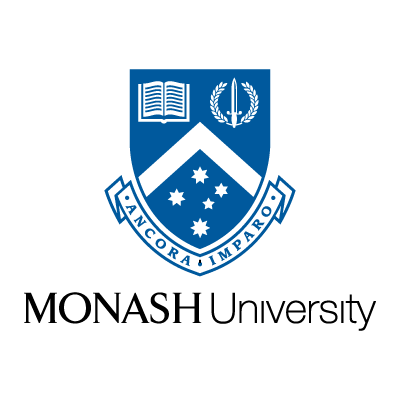

<h1><center>FIT5196 Data wrangling S2 2018 - Assignment 1</center></h1>

<h3><center>Name: Nisheeth Shah<br/>Id: 29599644<br/>Email: nsha0020@student.monash.edu</center></h3>

# Task 3 (Bonus): Ranking resumes w.r.t the job advertisements 

### Load/import required libraries

In [6]:
import os.path
import re
import json
from nltk.stem import PorterStemmer
from __future__ import division
import xml.etree.ElementTree as ET

### Reading first 500 job ads

In [22]:
with open("29599644_vocab.txt") as f1:
    vocab_index = f1.readlines()
vocab_index = [x.strip() for x in vocab_index] 
    
with open("29599644_countVec.txt") as f2:
    vocab_count = f2.readlines()
vocab_count = [x.strip() for x in vocab_count]

with open("29599644.dat") as f3:
    job_ads_str = f3.read()

job_ads = [x.strip() for x in vocab_count]

In [23]:
vocab_index[0]

'000:0'

### Check the total number of jobs posts

Every job ends by "------------------------------" in the file. We count the number of such dashes to identify the number of jobs.

In [39]:
number_of_jobs = 0

# converting the list of lines into one string
content_str = "".join(content)

number_of_jobs = content_str.count("------------------------------")
print("Total number of job posts:", number_of_jobs)

Total number of job posts: 31780


### We are already given a list of resumes to be worked on. Below is a list of those numbers
I've removed duplicate resumes from the list because it is incorrect to include repetitive data in our study

In [95]:
resume_numbers = [252,756,673,756,737,134,548,230,688,43,315,327,598,353,751,304,702,311
                    ,86,185,622,197,427,73,151,660,512,584,95,102,303,580,397,377,266,222
                    ,508,710,206,488,827,355,146,428,658,410,273,614,607,347,348,617,825,554
                    ,365,654,858,40,480,21,472,586,775,347,362,174,427,687,9,615,551,151
                    ,660,95,860,420,188,464,746,607,456,493,851,621,413,534,404,44,788,231
                    ,200,505,600,273,692,858,386,110,204,481,194,767,560,646,597,510,827,169
                    ,355,0,98,737,754,416,496,97,569,731,389,642,309,576,368,807,658,333
                    ,95,707,670,610,37,700,238,630,351,163,776,604,220,221,274,850,9,221
                    ,448,187,846,29,857,39,157,719,152,503,778,31,787,123,457,774,838,778
                    ,587,497,702,836,556,185,269,293,50,40,102,303,38,190,466,451,763,297
                    ,175,147,104,490,255,31,581,465,41,544,392,513,638,823,68,122,806,40
                    ,21,784,628,325,766,828,631,508,519,746,373,119,646,455,235,661,342,750
                    ,383,194,803,328,830,244,199,30,642,75,419,258,640,622,275,723,526,86
                    ,284,444,359,244,500,725,432,34,399,387,12,746,505,105,601,10]

resume_numbers = list(set(resume_numbers))

### Reading the stopwords file which is already given

In [96]:
with open('RequiredFilesForAssignment/stopwords_en.txt','r') as sw_file:
    stopwords_list_old = sw_file.readlines()

stopwords_list = ' '.join(stopwords_list_old).replace('\n','').split()

### Reading the resumes

The methods followed for this step are:
* Check if the resume file is present or not. For e.g. the resume_number list contains "0" but we don't have file "resume_(0).txt"
* Tokens are normalized to lowercase except the capital tokens appeared in the middle of a sentence/line. In the assignment, I am treating case sensitive words as different. For e.g.: "Register" and "register" is different. The reason for doing this is to make bigrams more efficient. 
Moreover, if a line contains only one upper case word, then the first character will become lowercase whereas the rest of the characters will remain uppercase.
* Using regex, we fetch each words from each resume. We create a new list which contains all tokens of a resume. And create another list which is a list that contains all the list of tokens (found using the regex)
* We remove all the stopwords from our data. The reason for this is ellaborated below
* If we don't find any file, we consider it as a blank file wherein there are no tokens in that particular file
* "full_uni_voc" is the final list of list of tokens. (The token list contains stopwords too)
* Print the number of lists (list of resumes)

### We'll remove all the stop words from our collected data so that we can get good quality output while performing further steps in the program
Here, we have removed only those stopwords that do not start by an upper case. We have retained these words to improve the quality of the bograms. For e.g.: "in" is a stopword but "Dine" and "In" can for one word "Dine In". Therefore, we remove only the stopwords from our data that start with a lower case

In [97]:
full_voc_with_sw = []
full_voc_without_sw = []
full_uni_voc = []

# Loop through all the resumes
for num in resume_numbers:
    
#     Store the boolen result of file present
    file_check = os.path.isfile('RequiredFilesForAssignment/resumeTxt/resume_(' + str(num) + ').txt')
    
#     If True if file is present then
    if file_check:
        
#         Open each file in loop
        with open('RequiredFilesForAssignment/resumeTxt/resume_(' + str(num) + ').txt','r', encoding="utf8") as resume_file:
#             Store the contents of the file in temp_str string variable
            temp_str = resume_file.read()

#         Tokens are normalized to lowercase except the capital tokens appeared in the middle of a sentence/line
        resume_content = re.sub('(^|\n)[A-Z]', lambda x: x.group().lower(), temp_str, flags=re.M)
    
#         Regex for fetching each token from the each resume
        tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")

#         Fetch all the token using above regex into a list. This is the full list of all the unigrams including the stopwords
        unigram_tokens = tokenizer.tokenize(resume_content)

#         Removing the stopwords from the list of unigrams
        stopped_tokens_full = [w for w in unigram_tokens if w not in stopwords_list]
        
#         Convert into unique list of tokens
        uni_voc = list(set(stopped_tokens_full))
    
#         Create one final list of all the list of tokens
        full_uni_voc.append(uni_voc)
        
#     If the file is not found or if the file is empty, the consider an empty file with no tokens
    else:
        full_uni_voc.append([])

    
print("Final length of dictionary:", len(full_uni_voc))

Final length of dictionary: 215


### Creating a dictionary using "full_uni_voc" list (created above). We'll use this dictionary variable in "MWETokenizer" method further in the program
Below is the partial screenshot of the dictionary structure
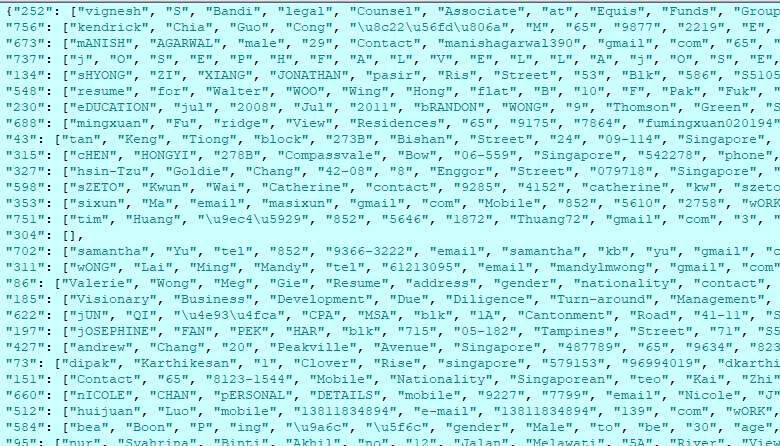
The screenshot is used just to visualise the structure of the dictionary. The values may vary

In [98]:
full_uni_voc_dictionary = {}

i=0
for numbr in resume_numbers:
    full_uni_voc_dictionary[numbr] = full_uni_voc[i]
    i += 1
    
full_uni_voc_dictionary

{0: [],
 9: ['AI',
  'real',
  'important',
  'Feb',
  'Manager',
  'Modelling',
  'entails',
  'sole',
  'Intensive',
  'Prize',
  '8527',
  'Shenzhen',
  'Hang',
  'GPA',
  '2007',
  'contribution',
  'allocation',
  'Jun',
  'sUMMARY',
  '1bn',
  'interacting',
  'trading',
  '94',
  'Bank',
  'Research',
  'articulate',
  'Built',
  'achieve',
  'culture',
  'sectors',
  'acquire',
  'faring',
  'fund',
  'Growth',
  'strong',
  '2010',
  'APAC',
  'AUM',
  'asset',
  'compliance',
  'track',
  'flexibility',
  'executives',
  'experts',
  '2017',
  '2016',
  'generated',
  'Fund',
  'Starting',
  'Impact',
  'utilities',
  'period',
  '4',
  'certs',
  'Fitch',
  'pension',
  'interests',
  '3',
  'inquisitiveness',
  'sense',
  'member',
  'broad',
  'joining',
  'knowledge',
  'private',
  'Training',
  'China',
  'analyst',
  'worse',
  'forward',
  'INFORMATION',
  'Nov',
  'Compliance',
  'master',
  'research',
  'years',
  'contest',
  '00',
  'Bloomberg',
  'portfolio',
  

### Creating a flat list i.e. a single list of all the tokens. We'll use this list for generating the bigrams


In [99]:
flat_list = []

flat_list = sum(full_uni_voc, [])

print(len(flat_list))
flat_list

74489


['tiation',
 '公司投资研究',
 'Co-authored',
 '2007',
 'construction',
 '析',
 'ability',
 '16',
 'Research',
 '罗会娟',
 '零售等',
 'CIO',
 'knowledge',
 'channel',
 '估值分析',
 'research',
 'ope',
 'university',
 '行业研究',
 '公司财务状况及行业分',
 'Estate',
 '07-Till',
 '拥有丰富的股票研究',
 '进行深度行业研究和渠道调研',
 '估值和分析技能',
 'Till',
 'Fluent',
 '债务结构',
 'previews',
 'independently',
 'IBD',
 'information',
 '熟悉多个行业',
 'target',
 'flow',
 'Analytics',
 'corporate',
 '04',
 'les',
 'll',
 'reports',
 'on-ground',
 'Language',
 'EXPERIENCE',
 '05',
 'Work',
 '14',
 'analysis',
 '经营数据并分析对公司的影响',
 'Consume',
 'B',
 '燃气',
 '撰写简报',
 'created',
 'Extensive',
 'internet',
 'markets',
 'making',
 '提供公司研究',
 'consumer',
 'Team',
 'news',
 'Retail',
 'Financial',
 'foundation',
 '股食品饮料公司的首发报告',
 'retail',
 'access',
 'valuations',
 'icipating',
 '07',
 '为亚太区域',
 '08',
 'tc',
 '竞争格局和未来展望等',
 '基准化',
 '持续关注公司事件和',
 'equity',
 '投资提供建议',
 'Native',
 'trend',
 'closely',
 '矿产以及银行等多个行业',
 'learning',
 'china',
 'eijing',
 'Responsible',
 'E

### Now, let's create a list of bigrams
"ngram" function (from ngram package from nltk library) provides the functionality to find the bigrams. For this, we need to set the "n" parameter to 2

And have a look at the 5 most common bigrams

In [100]:
# Create variable and store bigrams into it. Generate bigrams from the flatlist
bigrams = ngrams(flat_list, n = 2)
fdbigram = FreqDist(bigrams)

# Show 5 most common bigrams
fdbigram.most_common(5)

[(('English', 'management'), 55),
 (('team', 'Present'), 48),
 (('Ltd', 'Singapore'), 45),
 (('Asia', 'investment'), 42),
 (('Business', 'working'), 35)]

### Update the bigrams
We remove the tokens with length less than 3 from the vocab.
Then generate first 200 meaningful bigrams

In [101]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Generate
finder = nltk.collocations.BigramCollocationFinder.from_words(flat_list)

# Get top 200 bigrams
top_200_bigrams = finder.nbest(bigram_measures.pmi, 200) # Top-200 bigrams
top_200_bigrams

[('0027', 'camera'),
 ('017240', 'vBA'),
 ('0197', 'react'),
 ('0367', 'Recurrent'),
 ('0610', 'alert'),
 ('07-231', 'alwin'),
 ('07-Till', '拥有丰富的股票研究'),
 ('07-至今', '排名和并购市场趋势分析'),
 ('079718', 'hsin-Tzu'),
 ('079903', 'Feb-Dec'),
 ('0806', 'crest'),
 ('09-114', 'SAVER-Premium'),
 ('0992', 'acknowledgement'),
 ('100MM', '3-4'),
 ('100k-130k', 'stra'),
 ('10MM', 'articulating'),
 ('10km', 'QDII'),
 ('11-409', 'island'),
 ('113m', 'COLUMBIA'),
 ('12-Asset', '8-Securities'),
 ('12M', 'MAGAZINE'),
 ('12bn', 'rd-p'),
 ('13632576879', 'capitalizations'),
 ('1382', 'oMGEO'),
 ('1393', '3158'),
 ('163', 'HTHT'),
 ('168', 'Crown'),
 ('16bn', '9239'),
 ('16th', 'REINSURANCE'),
 ('17-08', 'POS'),
 ('17A', 'LY'),
 ('182', 'bowling'),
 ('1833', 'AEA'),
 ('185-2150', 'IRs'),
 ('1866', '1193'),
 ('1880', '891'),
 ('1929', 'cinemas'),
 ('1998-2000', 'Wachovia'),
 ('1998-2001', 'Philippine'),
 ('1Malaysia', 'Persiaran'),
 ('1billion', '2428'),
 ('2-B', 'may-Aug'),
 ('20-816', 'Perpetual'),
 ('2000-2001'

### Re-tokenize the tokens back into the dictionary of resumes
We have introduced the bigrams and want to make sure that these bigrams are not split into two separate unigrams in our token dictionary. Therefore, by using "mwetokenizer", we'll repair this gap

In [102]:
mwetokenizer = MWETokenizer(top_200_bigrams)

colloc_resumes =  dict((rid, mwetokenizer.tokenize(resume_list)) for rid,resume_list in full_uni_voc_dictionary.items())
all_words_colloc = list(set(list(chain.from_iterable(colloc_resumes.values()))))
print(len(all_words_colloc))

16909


### Dictionary of all the re-tokenized elements
A dictionary can be used to keep count of the re-tokenized collocations. The count will be TOTAL NUMBER OF OCCURRENCES of each collocation in the dictionary of all the resumes

In [103]:
# New dictionary to store the colloc and occurrence count. Initialially, set occurrences of all to 0
colloc_count_dict = {key: 0 for key in all_words_colloc}

# Using loops, we increment the count of occurrence if a token is matched
for each_colloc in all_words_colloc:
    for rid,resume_list in full_uni_voc_dictionary.items():
        if each_colloc in resume_list:
            colloc_count_dict[each_colloc] += 1

colloc_count_dict

{'financings': 1,
 'authentication': 4,
 'Launched': 2,
 '公司投资研究': 1,
 'Shu': 1,
 'pu': 1,
 'Insprasi': 1,
 'cantonese': 9,
 'cOO': 1,
 'trustworthy': 1,
 'Standards': 23,
 'competed': 1,
 '62': 1,
 'works': 13,
 'Unitised': 1,
 'apollo': 1,
 'amazing': 1,
 '12-year': 1,
 'Vijay': 1,
 'Yen': 2,
 'Rathathani': 1,
 'CFO': 11,
 'AIA': 2,
 'founder': 1,
 'citigroup': 3,
 'MetroWest': 1,
 'Navision': 1,
 'aLT': 1,
 'premium': 2,
 'precisely': 1,
 'Euromonitor': 3,
 'Trends': 1,
 'Bain': 2,
 'Meals': 1,
 'asked': 1,
 'CACS': 1,
 'sCOR': 1,
 '541278': 1,
 'france': 3,
 'precision': 3,
 'ed-Smiles': 1,
 'movements': 8,
 'Melaka': 1,
 'Car': 1,
 '包括': 1,
 '2008-2011': 1,
 'concrete': 1,
 'spots': 1,
 'moved': 1,
 'ADVISORS': 1,
 'translated': 1,
 '9023': 1,
 'Ordinances': 1,
 'commencement': 1,
 'comparables': 4,
 '4H2': 1,
 'divisional': 2,
 'Aderan': 1,
 'ROI': 2,
 'ope': 1,
 '3866': 1,
 'number': 12,
 'lidate': 1,
 'Ethernet': 1,
 'onboarded': 2,
 'Verbal': 1,
 'practising': 2,
 'serviced': 

### Remove -  
### - items with count below or above the threshold (i.e. below 2% or above 98%)
* Using simple calculation of percentage, we remove whose occurrence lie below 2% or above 98% of the times among all the resumes

### - items with length less than 3
The total number of resumes can be fetch from the size of "resume_numbers" list. We also have the dictionary which includes the counts of each collocation 

In [104]:
# Save number of resumes we have
total_length = len(resume_numbers)

# List to store values that are to be removed
removal_keys = []

# Remove those with occurrences<2% and occurrences>98%
# Also those with length<3
for k, v in colloc_count_dict.items():
    if  len(k)<3 or ((v*100)/total_length)>98 or ((v*100)/total_length)<2:
        removal_keys.append(k)

# Remove all the values (present in removal_keys list) from the dictionary
for key in removal_keys:
    if key in colloc_count_dict:
        del colloc_count_dict[key]

colloc_count_dict

{'cantonese': 9,
 'Standards': 23,
 'works': 13,
 'CFO': 11,
 'movements': 8,
 'number': 12,
 'Planned': 7,
 'Fall': 5,
 'Reporting': 46,
 'Project': 36,
 'secretaries': 5,
 'future': 8,
 'reports': 119,
 'beverage': 9,
 'collaterals': 5,
 'Merit': 17,
 'competencies': 7,
 'Yan': 5,
 'Best': 13,
 '2009': 80,
 'Team': 57,
 'timelines': 7,
 'commodity': 10,
 'framework': 13,
 'Programming': 5,
 'Returns': 5,
 'periodically': 6,
 'Minor': 7,
 'individually': 6,
 'branch': 7,
 'agents': 12,
 'road': 7,
 'provide': 44,
 'income': 32,
 'appraisal': 5,
 'proposal': 11,
 'learning': 11,
 'global': 50,
 'free': 5,
 'institute': 14,
 'Community': 10,
 'professional': 66,
 'disclosure': 9,
 'delivery': 18,
 'qUALIFICATIONS': 9,
 'meetings': 55,
 'in-charge': 5,
 'Covered': 5,
 'blk': 10,
 'charts': 5,
 'consolidated': 17,
 'Examination': 20,
 'points': 8,
 'pricing': 32,
 'lEADERSHIP': 7,
 'departments': 21,
 'change': 13,
 'person': 13,
 'reduce': 7,
 'organizational': 9,
 'Test': 12,
 'clients'

### Sort alphabetically
Fetch the list of keys from the collocation dictionary (colloc_count_dict) and sort in alphabetical order

In [105]:
sorted_collocations = list(colloc_count_dict.keys())
sorted_collocations.sort()
sorted_collocations

['000',
 '100',
 '1000',
 '120',
 '150',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '1st',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2012-2013',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '250',
 '2nd',
 '300',
 '300m',
 '3rd',
 '400',
 '500',
 '852',
 'ACCA',
 'ACHIEVEMENTS',
 'ACRA',
 'ACTIVITIES',
 'AML',
 'AND',
 'APAC',
 'ASEAN',
 'AUM',
 'AWARDS',
 'Abdul',
 'Ability',
 'Able',
 'Academic',
 'Access',
 'Account',
 'Accountancy',
 'Accountant',
 'Accountants',
 'Accounting',
 'Accounts',
 'Achieved',
 'Achievement',
 'Achievements',
 'Acquired',
 'Acquisition',
 'Acquisitions',
 'Act',
 'Acted',
 'Actively',
 'Activities',
 'Address',
 'Admin',
 'Administration',
 'Administrative',
 'Administrator',
 'Administrators',
 'Advanced',
 'Advent',
 'Advised',
 'Advising',
 'Advisors',
 'Advisory',
 'Affairs',
 'Africa',
 'Agen

### Stemming
(1) Stem the sorted list

In [106]:
# Perform stemming on the sorted list
stemmer = PorterStemmer()

stem_list = ['{1}'.format(w, stemmer.stem(w)) for w in sorted_collocations]

(2) Stem the list in the dictionary

In [107]:
# Perform stemming on the dictionary
stemmer = PorterStemmer()
stem_dictionary = {}

for k, v in full_uni_voc_dictionary.items():
    temp_list = ['{1}'.format(w, stemmer.stem(w)) for w in v]
    stem_dictionary[k] = temp_list

### Generate the output files
#### 29599644_vocab.txt

    - We have list of stemmed vocabs
    - Loop a counter to assign the integer index for each vocab
    - Write each vocab with its intger index into the file

In [108]:
# Counter variable of integer index for each vocab
integer_index = 0

# Save a copy of content that we are writing in the file into a dictionary variable. 
# This dictionary will be used in creating the next file
_29599644_vocab = {}

# Loop to write/store vocab with unique ID
with open('29599644_vocab.txt', 'w') as file:
    for each in stem_list:
        _29599644_vocab[each] = integer_index
        file.write(each + ":" + str(integer_index) + "\n")
        integer_index += 1

print("File created!")

File created!


#### 29599644_countVec.txt
    - We have dictionary of resume stemmerred tokens with resume number ID. Also, we have the dictionary of stemmered vocabs with index
    - Using these two dictionaries, we find out the count of each vocab in the resume dictionary
    - Write the file as per question format

In [109]:
# First open the file. If not exists, then it will be created
with open('29599644_countVec.txt', 'w') as file:

#     Loop through resume dictionary and check the occurrences of each vocab in respective resume
    for rid, rlist in stem_dictionary.items():
        
#         Write the file name at the beginning of each line
        file.write("resume_(" + str(rid) + ")")
        for k, v in _29599644_vocab.items():
            count = rlist.count(k)
            file.write("," + str(v) + ":" + str(count))
        file.write("\n")
        
print("File created!")

File created!
